In [1]:
import warnings
warnings.filterwarnings('ignore')
# import geoplot as gplt

import geopandas as gpd
# import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import laspy
import rasterio
from rasterio.plot import show
from rasterio import mask
import folium

In [2]:
iowa_tif = "../geosome/tif/IA_FullState.tif"
#
#plt won't work because tiff is an object not an array
raster_iowa = rasterio.open(iowa_tif)

In [3]:
full_image = raster_iowa.read()
full_image.shape

(1, 2001, 2001)

In [4]:
num_bands = raster_iowa.count
num_bands

1

In [5]:
img_band =  raster_iowa.read(1)

#1 band 2d image

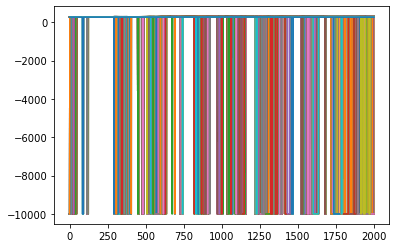

In [6]:
plt.plot(img_band)
plt.show()

In [7]:
#find out CRS
print("Co-ordinate Reference System:", raster_iowa.crs)

Co-ordinate Reference System: EPSG:3857


In [8]:
metadata = raster_iowa.meta
print("Metadata: {metadata}\n".format(metadata=metadata))

Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': -9999.0, 'width': 2001, 'height': 2001, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(1.0, 0.0, -10425171.94,
       0.0, -1.0, 5166495.71)}



In [9]:
desc = raster_iowa.descriptions
print('Raster description: {desc}\n'.format(desc=desc))

Raster description: ('idw',)



In [10]:
#geo-transform
print("Geotransform:",raster_iowa.transform)

Geotransform: | 1.00, 0.00,-10425171.94|
| 0.00,-1.00, 5166495.71|
| 0.00, 0.00, 1.00|


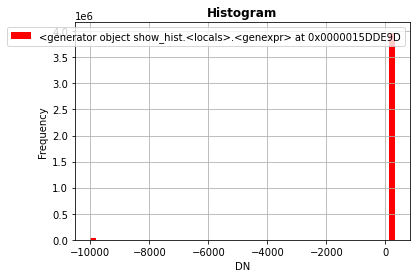

In [11]:
rasterio.plot.show_hist(full_image,bins=50,histtype='stepfilled',lw=0.0,stacked=False)

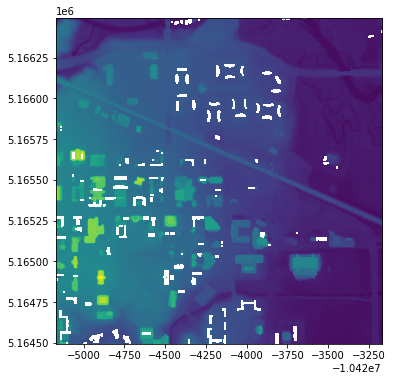

<AxesSubplot:>

In [12]:
plt.figure(figsize=(10, 6))
show(raster_iowa)

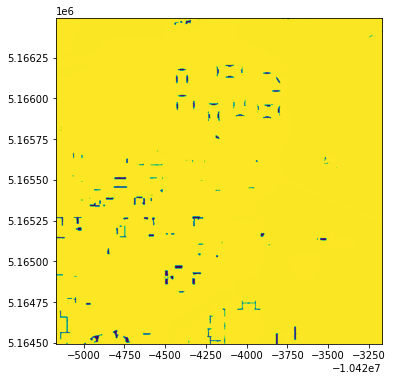

<AxesSubplot:>

In [13]:
plt.figure(figsize=(10, 6))
show((raster_iowa, 1), transform=raster_iowa.transform, cmap='viridis')

<AxesSubplot:>

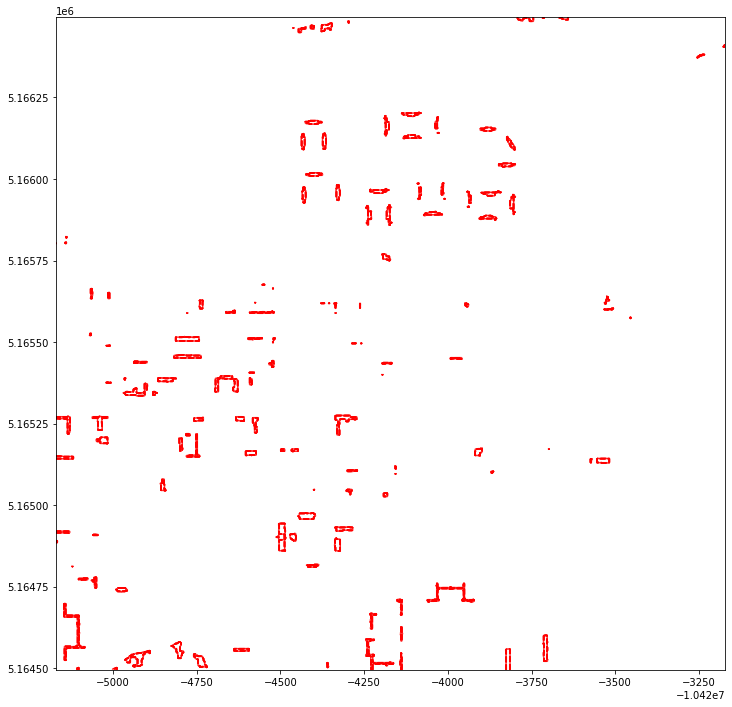

In [14]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show((raster_iowa, 1), ax=ax, contour=True, contour_label_kws={})

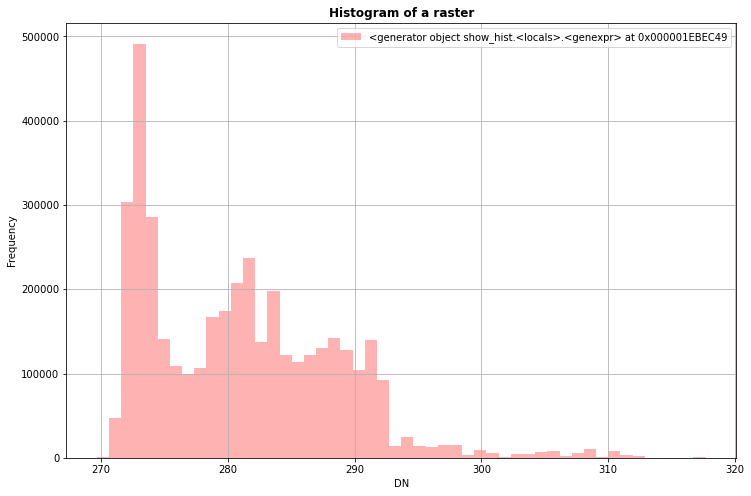

In [33]:
plt.figure(figsize=(12, 8))
from rasterio.plot import show_hist
show_hist(
    raster_iowa, bins=50, lw=0.0, stacked=False, alpha=0.3,
   histtype='stepfilled', title="Histogram of a raster")

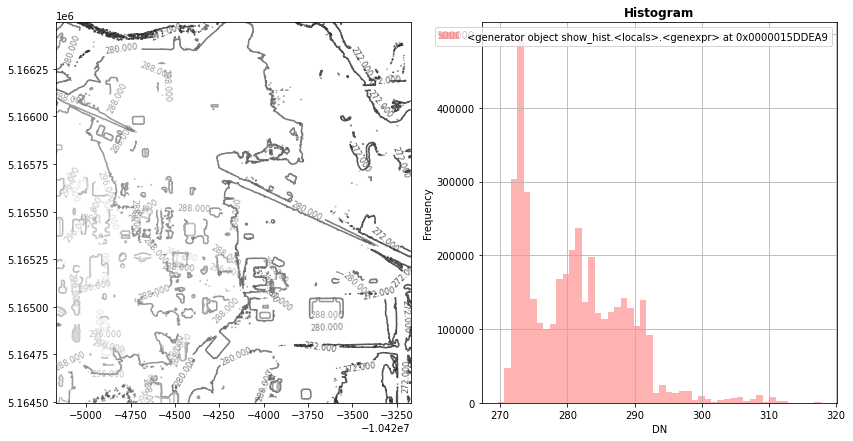

In [16]:
from rasterio.plot import show_hist
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))

show((raster_iowa), cmap='Greys_r', contour=True, ax=axrgb)
show_hist(raster_iowa, bins=50, histtype='stepfilled',lw=0.0, stacked=False, alpha=0.3, ax=axhist)
plt.show()